/tmp/ipykernel_7396/3952278815.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre["foulsPerTackle"] = df_filtre["foulsPerTackle"].round(2)
/tmp/ipykernel_7396/3952278815.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre["penaltiesAwardedAgainstPerGame"] = df_filtre["penaltiesAwardedAgainstPerGame"].round(2)
/tmp/ipykernel_7396/3952278815.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

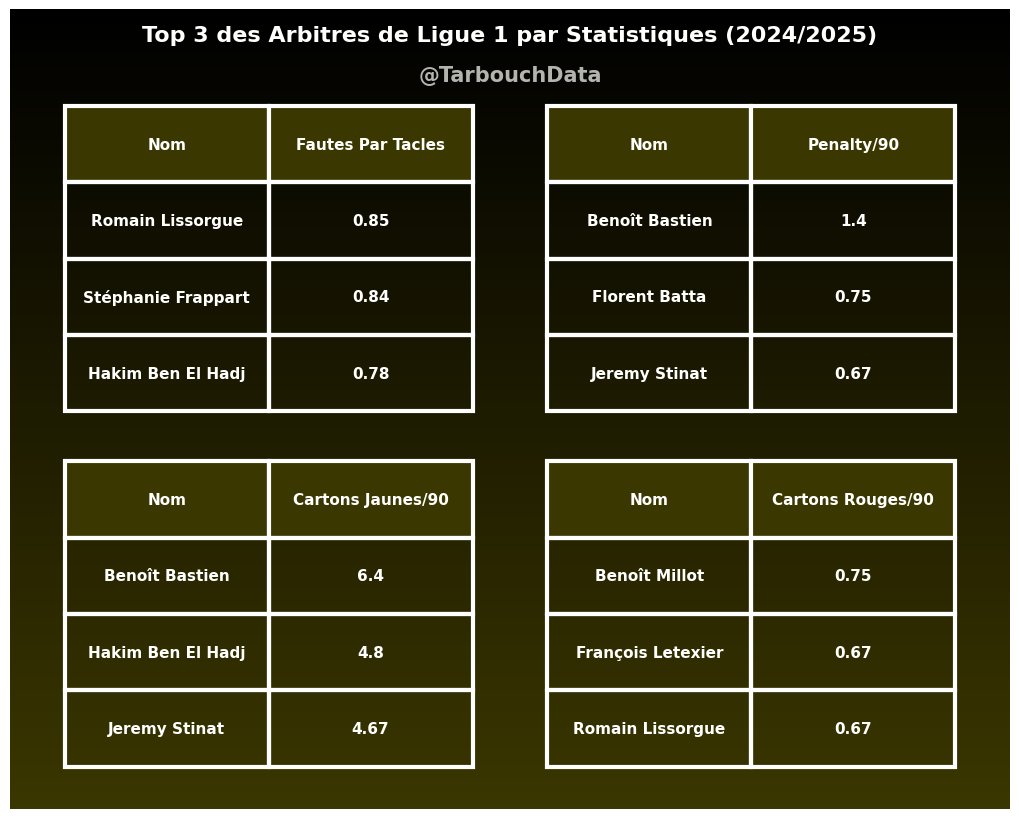

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Charger le fichier CSV
file_path = "../../data/arbitres/arbitres_data.csv"
df = pd.read_csv(file_path)

# Filtrer les colonnes nécessaires
colonnes_necessaires = [
    "foulsPerTackle", 
    "penaltiesAwardedAgainstPerGame", 
    "yellowCdsPerGame", 
    "redCdsPerGame", 
    "name"
]
df_filtre = df[colonnes_necessaires]

# Arrondir les statistiques à deux décimales
df_filtre["foulsPerTackle"] = df_filtre["foulsPerTackle"].round(2)
df_filtre["penaltiesAwardedAgainstPerGame"] = df_filtre["penaltiesAwardedAgainstPerGame"].round(2)
df_filtre["yellowCdsPerGame"] = df_filtre["yellowCdsPerGame"].round(2)
df_filtre["redCdsPerGame"] = df_filtre["redCdsPerGame"].round(2)

# Top 3 pour chaque statistique
top_3_fautes_par_tacle = df_filtre.nlargest(3, 'foulsPerTackle')[['name', 'foulsPerTackle']]
top_3_penalites_par_jeu = df_filtre.nlargest(3, 'penaltiesAwardedAgainstPerGame')[['name', 'penaltiesAwardedAgainstPerGame']]
top_3_cartons_jaunes_par_jeu = df_filtre.nlargest(3, 'yellowCdsPerGame')[['name', 'yellowCdsPerGame']]
top_3_cartons_rouges_par_jeu = df_filtre.nlargest(3, 'redCdsPerGame')[['name', 'redCdsPerGame']]

# Fonction pour créer un fond en dégradé
def creer_fond_degrade(fig, couleur1="#000000", couleur2="#3b3700"):
    # Créer un gradient vertical (de haut en bas)
    gradient = np.linspace(0, 1, 256).reshape(-1, 1)
    gradient = np.hstack((gradient, gradient))

    # Créer un colormap personnalisé
    cmap = mcolors.LinearSegmentedColormap.from_list("", [couleur1, couleur2])

    # Ajouter un axe qui occupe toute la figure
    ax = fig.add_axes([0, 0, 1, 1], zorder=-1)

    # Désactiver les axes
    ax.axis('off')

    # Appliquer le gradient vertical
    ax.imshow(gradient, aspect='auto', cmap=cmap, extent=[0, 1, 0, 1])

# Configurer la figure et appliquer le fond en dégradé
fig, axs = plt.subplots(2, 2, figsize=(10, 8), facecolor='none')
creer_fond_degrade(fig, couleur1="#000000", couleur2="#3b3700")

# Ajouter le titre principal et le texte "@TarbouchData"
fig.suptitle("Top 3 des Arbitres de Ligue 1 par Statistiques (2024/2025)", weight='bold', fontsize=16, color='white')
fig.text(0.5, 0.93, "@TarbouchData", ha='center', va='top', fontsize=15, color='white', weight='bold', alpha=0.7)

# Fonction pour styliser chaque tableau
def styliser_tableau(ax, data, titre):
    ax.axis('off')
    # Traduire les colonnes
    data.columns = ['Nom', titre]
    table = ax.table(cellText=data.values, colLabels=data.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1.5, 4)  # Augmenter la taille du tableau (hauteur et largeur)

    # Appliquer des bordures blanches épaisses et un texte gras
    for key, cell in table.get_celld().items():
        cell.set_edgecolor('white')  # Bordure blanche
        cell.set_linewidth(3)  # Bordures épaisses
        cell.set_text_props(weight='bold', color='white')  # Texte gras
        if key[0] == 0:  # En-tête
            cell.set_facecolor('#3b3700')  # Couleur de l'en-tête
            cell.set_text_props(color='white')  # Texte en blanc pour l'en-tête
        else:
            cell.set_facecolor('none')  # Cases transparentes pour les autres lignes

# Appliquer le style pour chaque tableau
styliser_tableau(axs[0, 0], top_3_fautes_par_tacle, "Fautes Par Tacles")
styliser_tableau(axs[0, 1], top_3_penalites_par_jeu, "Penalty/90")
styliser_tableau(axs[1, 0], top_3_cartons_jaunes_par_jeu, "Cartons Jaunes/90")
styliser_tableau(axs[1, 1], top_3_cartons_rouges_par_jeu, "Cartons Rouges/90")

# Ajustements et affichage sans bordure blanche
plt.tight_layout(pad=2.5)
plt.show()
